In [1]:
import pandas as pd
import os
pd.set_option('display.max_colwidth', None)
from hack_triage import *
%matplotlib inline

In [2]:
# Configure analysis parameters
symbols = {
    'BTC': [90],
}

# Fetch data
market_data = fetch_market_data(symbols)

In [3]:
market_data.head(2)

,symbol,open,high,low,close,volume,trade_count,vwap,period
timestamp,,,,,,,,,
2025-01-21 06:00:00+00:00,BTC,101244.230,107283.004,101022.3000,105711.8395,3.171442,242.0,105740.547844,90
2025-01-22 06:00:00+00:00,BTC,105626.619,105968.503,101564.3425,102475.8450,5.280590,326.0,103587.022658,90


In [4]:
df = market_data.reset_index().copy()

08:02:25 - cmdstanpy - INFO - Chain [1] start processing
08:02:25 - cmdstanpy - INFO - Chain [1] done processing


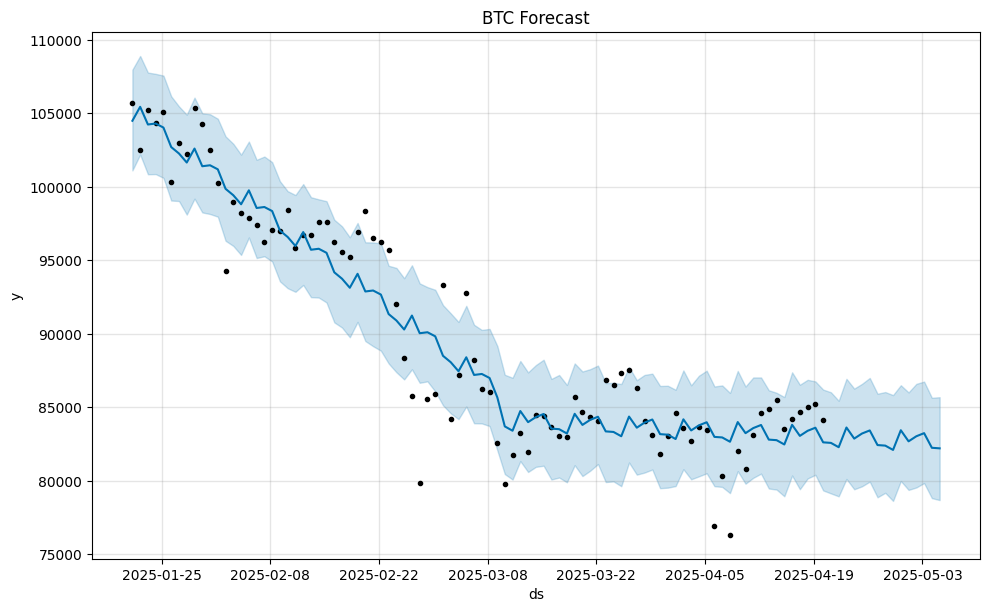

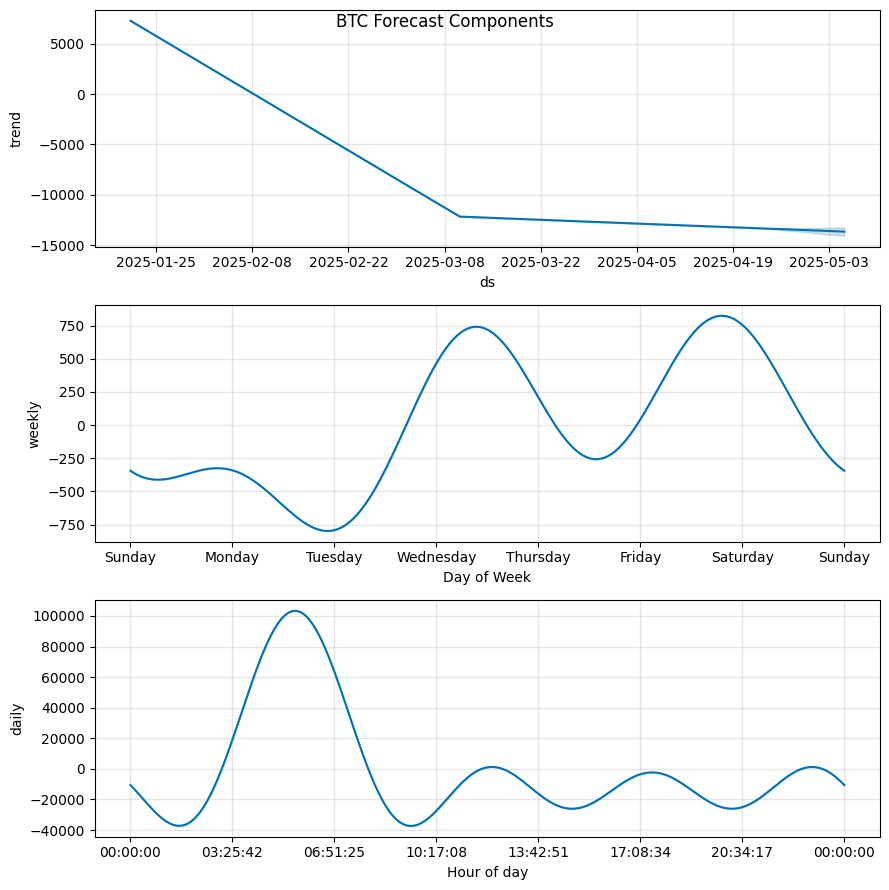

In [6]:
from prophet_model import *
prophet_data = prepare_data_for_prophet(market_data, "BTC", lookback_days=90)
forecast, fig1, fig2 = run_prophet_model(prophet_data, "BTC", 15)

In [13]:
forecast.tail(1)[['ds','yhat_lower','yhat_upper','yhat']]

,ds,yhat_lower,yhat_upper,yhat
104,2025-05-05 05:00:00,78691.082438,85689.411654,82209.918442


In [15]:
forecast.to_csv("btc_time_series_prediction.csv",index=False)